In [1]:
import numpy as np
import matplotlib.pyplot as plt

def funct(x,w):                         # Parabola Function
    f = w[2]*x*x + w[1]*x + w[0]
    return f

def grad_funct(x,w):                    # Gradient of Parabola w.r.t. x
    grad = 2*w[2]*x + w[1]
    return grad

In [2]:
%matplotlib inline

Text(0, 0.5, 'f(x)')

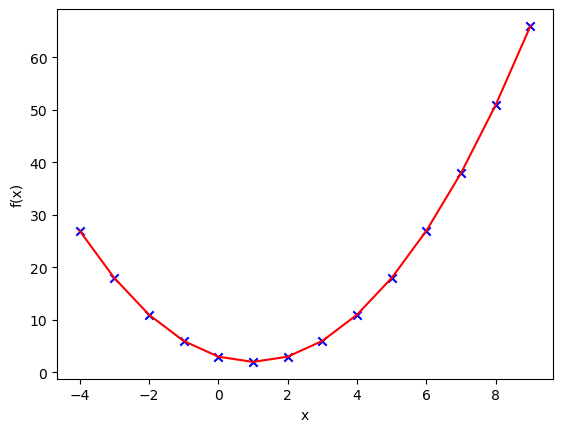

In [3]:
# Cooking up some data
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])       # Inputs
w = np.array([3, -2, 1])                                           # Actual Weights
f = funct(x,w)

# Plotting the data
plt.scatter(x, f, c="b", marker='x')
plt.plot(x, f, c="r")
plt.xlabel("x")
plt.ylabel("f(x)")

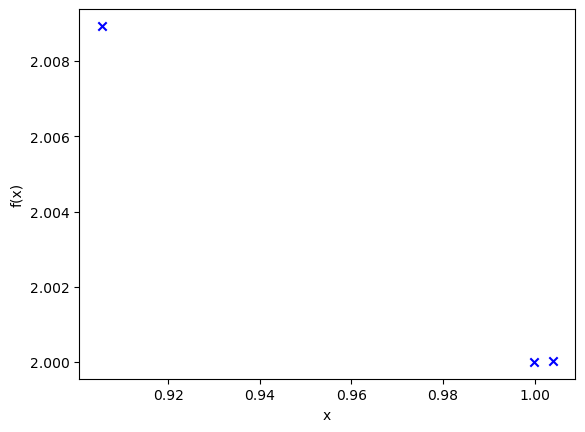

In [7]:
# Gradient Descent with ADAM Optimizer on the Parabola

# Initialization
x = 6
alpha = 0.1
beta1 = 0.9
beta2 = 0.9
min_abs_change = 1e-4
max_iter = 1000
m = 0*x
v = 0*x
epsilon = 10e-8
x_series = [x]
iterations = 1

while True:
    f = funct(x,w)
    grad = grad_funct(x,w)
    m = beta1*m + (1-beta1) * grad
    v = beta2*v + (1-beta2) * grad *grad
    m_hat = m / (1-np.power(beta1,iterations))
    v_hat = v / (1-np.power(beta2,iterations))
    x_new = x - alpha * m_hat / np.sqrt(v_hat+epsilon)
    
    # Stopping Conditions
    if abs(x_new - x) < min_abs_change:
        break
    if iterations >= max_iter:
        break
        
    # Plot data
    if iterations % (max_iter/10) == 0:
        plt.scatter(x, f, c="b", marker='x')
        plt.xlabel("x")
        plt.ylabel("f(x)")
        
    iterations += 1
    x = x_new
    x_series = np.concatenate((x_series, [x]))

In [8]:
x_series

array([6.        , 5.9       , 5.80000509, 5.70001893, 5.60004539,
       5.50008851, 5.40015257, 5.30024207, 5.20036171, 5.10051644,
       5.00071145, 4.90095218, 4.80124438, 4.70159405, 4.60200756,
       4.50249158, 4.4030532 , 4.30369992, 4.2044397 , 4.10528103,
       4.00623298, 3.90730525, 3.80850828, 3.70985333, 3.61135259,
       3.51301928, 3.41486781, 3.31691395, 3.219175  , 3.12167   ,
       3.02441998, 2.92744828, 2.83078084, 2.73444664, 2.63847809,
       2.54291165, 2.44778836, 2.35315464, 2.25906311, 2.16557363,
       2.07275442, 1.9806835 , 1.88945028, 1.79915746, 1.70992321,
       1.62188368, 1.53519591, 1.45004097, 1.36662755, 1.28519563,
       1.20602021, 1.1294147 , 1.05573345, 0.98537283, 0.91876973,
       0.85639647, 0.79875107, 0.74634187, 0.6996663 , 0.65918489,
       0.62529261, 0.59829123, 0.57836682, 0.56557603, 0.55984317,
       0.56096773, 0.5686402 , 0.58246237, 0.60196857, 0.62664467,
       0.65594281, 0.68929085, 0.72609639, 0.76574557, 0.80759

In [9]:
iterations

362